### Deep Learning feat. Iris

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train, epochs=200)

model.evaluate(X_test, y_test)

# predictions = model.predict(x_new_data)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2573 - loss: 3.3658  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3136 - loss: 2.6922 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3011 - loss: 2.3774 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2823 - loss: 2.0927 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3063 - loss: 1.7014 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3125 - loss: 1.4119 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3157 - loss: 1.1823 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2584 - loss: 1.0690 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3208 - loss: 0.9205 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6753 - loss: 0.8688 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6802 - loss: 0.8575
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6864 - lo

[0.2055026739835739, 0.9777777791023254]

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import concatenate, Activation

input = Input(shape=(4,))
dense1 = Dense(50, activation='relu')(input)
dense2 = Dense(80, activation='relu')(input)
dense3 = Dense(30, activation='relu')(input)

x = concatenate([dense1, dense2, dense3])

output = Dense(3, activation='softmax')(x)
model = Model(inputs=input, outputs=output)
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 50)        │        250 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 80)        │        400 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 30)        │        150 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 160)       │          0 │ dense_23[0][0],   │
│ (Concatenate)       │                   │            │ dense_24[0][0],   │
│                     │                   │            │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 3)         │        483 │ concatenate_4[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,283 (5.01 KB)

 Trainable params: 1,283 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train, epochs=200)

model.evaluate(X_test, y_test)

# predictions = model.predict(x_new_data)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3413 - loss: 1.7094  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1978 - loss: 1.3089 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3458 - loss: 1.1221 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3781 - loss: 1.0685 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3614 - loss: 1.0085 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3458 - loss: 0.9466 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6889 - loss: 0.8492 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6954 - loss: 0.8075 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7985 - loss: 0.7574 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8758 - loss: 0.7483 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8953 - loss: 0.6928 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8238 - lo

[0.09731914848089218, 1.0]

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │            93 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,873 (7.32 KB)

 Trainable params: 1,873 (7.32 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train, epochs=200)

model.evaluate(X_test, y_test)

# predictions = model.predict(x_new_data)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3278 - loss: 1.5071  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3288 - loss: 1.4013 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3538 - loss: 1.2646 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3361 - loss: 1.2032 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3434 - loss: 1.1632 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3142 - loss: 1.1367 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3434 - loss: 1.0968
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3309 - loss: 1.0670
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3549 - loss: 1.0520
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4449 - loss: 1.0528 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6833 - loss: 1.0391 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7062 - loss:

[0.12867341935634613, 1.0]

In [20]:
from tensorflow.keras import Sequential, layers

model = Sequential()
model.add(layers.Input(shape=(4,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 50)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 3)              │           183 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,493 (13.64 KB)

 Trainable params: 3,493 (13.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train, epochs=20)

model.evaluate(X_test, y_test)

# predictions = model.predict(x_new_data)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4014 - loss: 1.4209  
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3995 - loss: 1.2589 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6833 - loss: 1.1191 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.9430 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7000 - loss: 0.8620 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6979 - loss: 0.7939 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7218 - loss: 0.7281 
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.7098 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7010 - loss: 0.6586 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6635 - loss: 0.6516 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7000 - loss: 0.5961 
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7104 - loss: 0.5632 


[0.4706653952598572, 0.7111111283302307]

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train, y_train, epochs=200)

model.evaluate(X_test, y_test)

# predictions = model.predict(x_new_data)


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2886 - loss: 1.4584  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3167 - loss: 1.1291
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3943 - loss: 1.0087 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7024 - loss: 0.9044 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6823 - loss: 0.8393 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7568 - loss: 0.7971 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8789 - loss: 0.7455 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7211 - loss: 0.7045 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6948 - loss: 0.6552 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6864 - loss: 0.6274 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7634 - loss: 0.5770 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9570 - los

[0.06730999052524567, 1.0]

In [ ]:
# Iris 데이터셋 실험용 모델 템플릿 (TensorFlow/Keras 기반)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# 1. 데이터 로딩 및 전처리
iris = load_iris()
X = iris.data
y = to_categorical(iris.target)  # one-hot encoding

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 실험 변수 설정 (여기만 바꿔가며 실험!)
HIDDEN_LAYER_SIZES = [60, 30]        # 은닉층 뉴런 수 리스트
# ACTIVATIONS = ['relu', 'tanh', 'sigmoid']       # 은닉층에 사용할 activation 함수
ACTIVATIONS = 'relu'
OUTPUT_ACTIVATION = 'softmax'        # 출력층 activation
EPOCHS = 100                         # 학습 epoch 수

# 3. 모델 구성
model = Sequential()
model.add(Dense(HIDDEN_LAYER_SIZES[0], input_shape=(4,), activation=ACTIVATIONS[0]))

if len(HIDDEN_LAYER_SIZES) > 1:
    model.add(Dense(HIDDEN_LAYER_SIZES[1], activation=ACTIVATIONS[1]))

model.add(Dense(3, activation=OUTPUT_ACTIVATION))  # Iris는 3-class 분류

# 4. 컴파일 & 학습
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    batch_size=8,
                    validation_split=0.2,
                    verbose=0)

# 5. 평가
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f} | Test Accuracy: {acc:.4f}")




c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.0214 | Test Accuracy: 1.0000


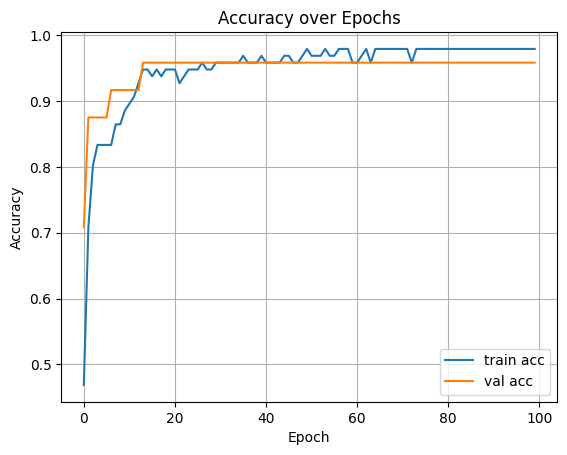

In [24]:
# 6. 시각화 (선택)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [27]:
# 🧪 다양한 모델 구조 자동 실험 코드 (Iris + Keras)

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

# 1. 데이터 로딩 및 전처리
iris = load_iris()
X = iris.data
y = to_categorical(iris.target)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_small = X_train[:30]
y_small = y_train[:30]

noise = np.random.normal(0, 0.5, X_small.shape)
X_train_noisy = X_small + noise

# 2. 실험 설정 리스트
experiments = [
    {'layers': [16], 'activations': ['relu'], 'epochs': 100},
    {'layers': [64, 32], 'activations': ['relu', 'relu'], 'epochs': 100},
    {'layers': [32, 16], 'activations': ['tanh', 'tanh'], 'epochs': 100},
    {'layers': [64, 32, 16], 'activations': ['relu', 'relu', 'relu'], 'epochs': 200},
    {'layers': [50, 60], 'activations': ['relu', 'relu'], 'epochs': 200},
]

# 3. 결과 저장용 리스트
results = []

# 4. 실험 반복
for i, exp in enumerate(experiments):
    model = Sequential()
    model.add(Dense(exp['layers'][0], input_shape=(4,), activation=exp['activations'][0]))
    
    for l, act in zip(exp['layers'][1:], exp['activations'][1:]):
        model.add(Dense(l, activation=act))
    
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train_noisy, y_small, epochs=exp['epochs'], batch_size=8,
              validation_split=0.2, verbose=0)

    loss, acc = model.evaluate(X_test, y_test, verbose=0)

    results.append({
        'Experiment': f"Exp {i+1}",
        'Layers': exp['layers'],
        'Activations': exp['activations'],
        'Epochs': exp['epochs'],
        'Test Loss': round(loss, 4),
        'Test Accuracy': round(acc, 4)
    })

# 5. 결과 출력
df = pd.DataFrame(results)
print(df)


c:\Users\main\miniconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Experiment        Layers         Activations  Epochs  Test Loss  \
0      Exp 1          [16]              [relu]     100     0.4785   
1      Exp 2      [64, 32]        [relu, relu]     100     0.3907   
2      Exp 3      [32, 16]        [tanh, tanh]     100     0.3362   
3      Exp 4  [64, 32, 16]  [relu, relu, relu]     200     1.4783   
4      Exp 5      [50, 60]        [relu, relu]     200     0.7401   

   Test Accuracy  
0         0.7667  
1         0.7333  
2         0.9333  
3         0.6333  
4         0.7000  
